<a href="https://colab.research.google.com/github/lcbjrrr/algojust/blob/main/Pmpt02_selectionBias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- **Selection bias**: Occurs when the data sample is not representative of the target population. This can happen due to non-random sampling, over- or underrepresentation of certain groups, or self-selection bias. For example, a study on the health effects of alcohol that only recruits participants from bars and nightclubs will not represent the general population's alcohol consumption habits

*The data used herein is for illustrative purposes only and does not reflect actual real-world data*



> Read the 'Census - USA.csv' file and show the dataframe



In [1]:
import pandas as pd

df = pd.read_csv('Census - USA.csv')
df.head()

,State,female,Race,Citizen,Income,Profession
0,Alabama,1,Black,False,44922.0,SelfEmployed
1,Alabama,1,White,True,51965.0,PublicWork
2,Alabama,1,Hispanic,False,63092.0,PrivateWork
3,Alabama,1,Black,True,34821.0,PrivateWork
4,Alabama,1,Asian,False,31390.0,SelfEmployed


#### Is it correct that the majority of Americans are either Hispanic or Asian?



> Create a aggregated table grouped by Race and count the number of people of each. Then show a bar plot comparing those



Race
White       22856
Hispanic    21625
Asian       17045
Black        5724
Native       3773
Pacific      2288
Name: count, dtype: int64


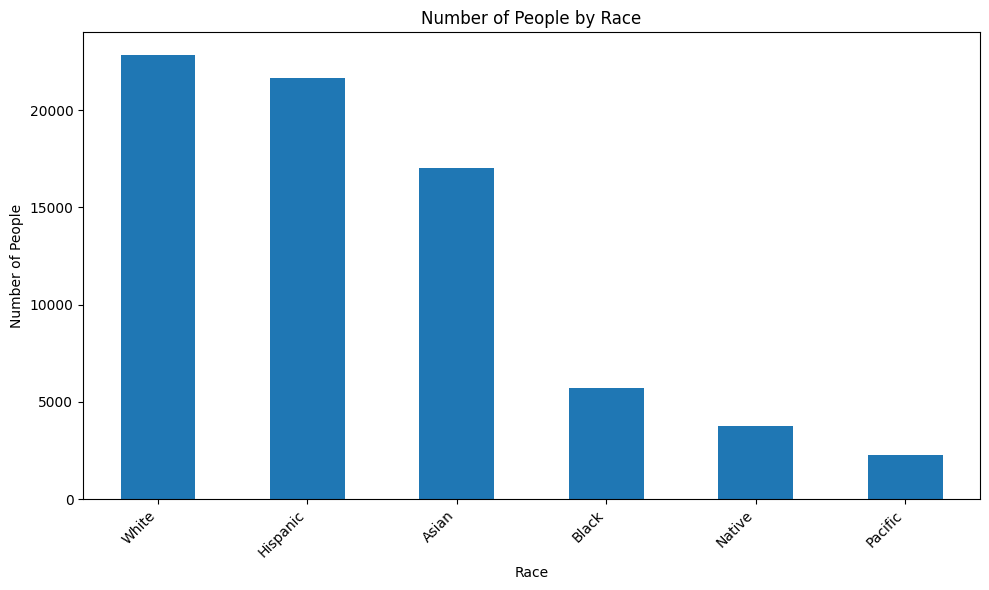

In [2]:
import matplotlib.pyplot as plt

race_counts = df['Race'].value_counts()
print(race_counts)

plt.figure(figsize=(10, 6))
race_counts.plot(kind='bar')
plt.title('Number of People by Race')
plt.xlabel('Race')
plt.ylabel('Number of People')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*This graph does not accurately represent general US demographics. The dataset significantly overrepresents Hispanic and Asian populations while underrepresenting White and Black populations compared to national averages. This indicates selection bias within the sample, meaning it is not representative of the broader US population*.

#### Is this data sample a realistic representation of the population that we are trying to analyze?



> Aggregate the data by Citzen status and count each person based on that. After that plot a pie chat showing hte propotion of those



Citizen
False    38709
True     34602
Name: count, dtype: int64


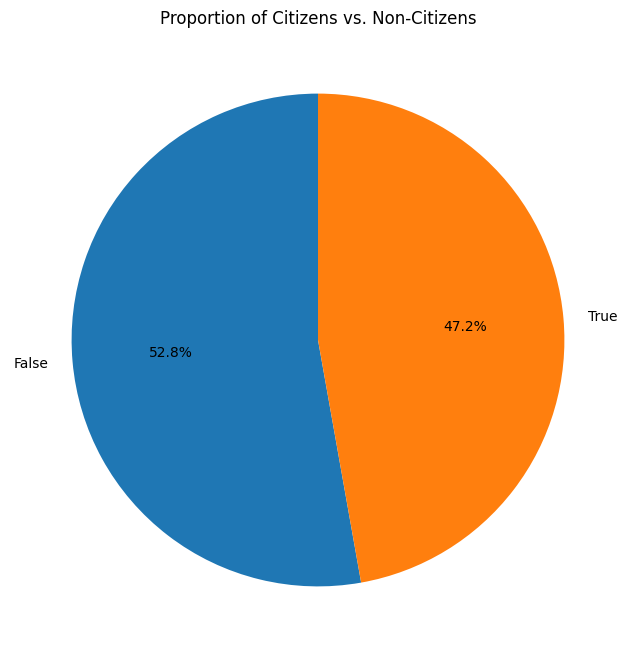

In [3]:
import matplotlib.pyplot as plt

citizen_counts = df['Citizen'].value_counts()
print(citizen_counts)

plt.figure(figsize=(8, 8))
citizen_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Citizens vs. Non-Citizens')
plt.ylabel('') # Hide the default 'Citizen' label on the y-axis
plt.show()



*The pie chart indicates that the dataset contains a slightly higher proportion of non-citizens (approximately 52.8%) compared to citizens (approximately 47.2%*).





> Create a dataframe filtered only with citzens



In [4]:
citizens_df = df[df['Citizen'] == True]
citizens_df.head()

,State,female,Race,Citizen,Income,Profession
1,Alabama,1,White,True,51965.0,PublicWork
3,Alabama,1,Black,True,34821.0,PrivateWork
7,Alabama,1,Black,True,51206.0,PublicWork
10,Alabama,1,White,True,41970.0,PrivateWork
13,Alabama,1,Black,True,24464.0,PrivateWork




> Create a aggregated table grouped by Race and count the number of people of each. Then show a bar plot comparing those



Race
White       47.057974
Hispanic    22.680770
Asian       11.528235
Black        7.597827
Native       6.060343
Pacific      5.074851
Name: count, dtype: float64


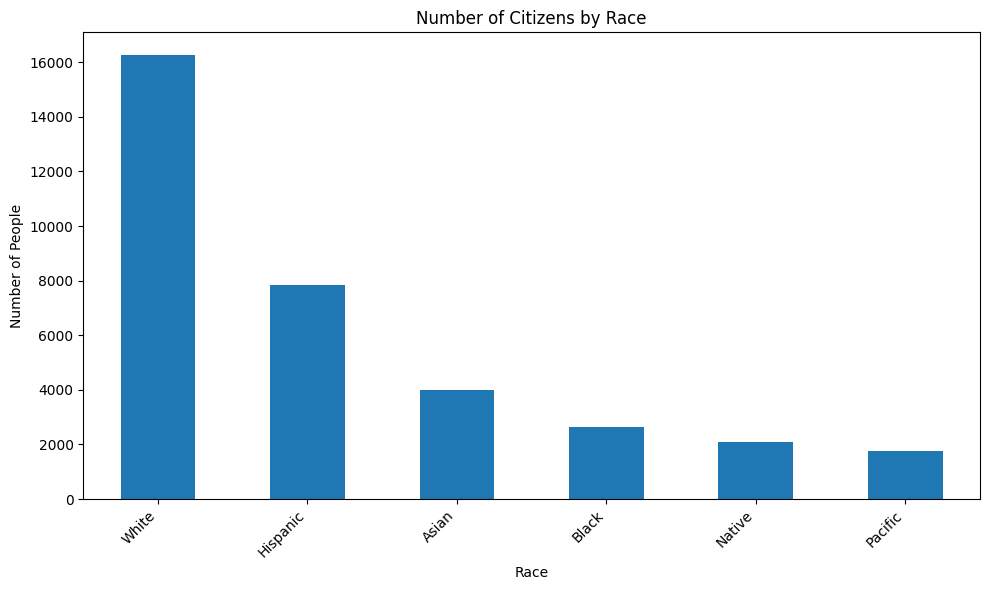

In [7]:
import matplotlib.pyplot as plt

citizens_race_counts = citizens_df['Race'].value_counts()
print(citizens_race_counts/len(citizens_df)*100)

plt.figure(figsize=(10, 6))
citizens_race_counts.plot(kind='bar')
plt.title('Number of Citizens by Race')
plt.xlabel('Race')
plt.ylabel('Number of People')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*US citizen demographics filtered only by citzens: White citizens make up approximately 47.06% of the citizen population; Hispanic citizens are about 22.68% in this dataset; Asian citizens represent about 11; Black citizens account for about 7.60%.*

#### Back to the Citizen vs Non-citizen, the Aliens residents leans more on the welfare programs and usually don't work.



> Aggregate the original dataset grouping by Profession and Citzen. Plot a bar chart comparing those, having the Citzenship with different colors (hue)



Citizen       False  True 
Profession                
FamilyWork     1631   1204
PrivateWork   16423  16657
PublicWork     4170   3446
SelfEmployed  11755   8836
Unemployment   4730   4459


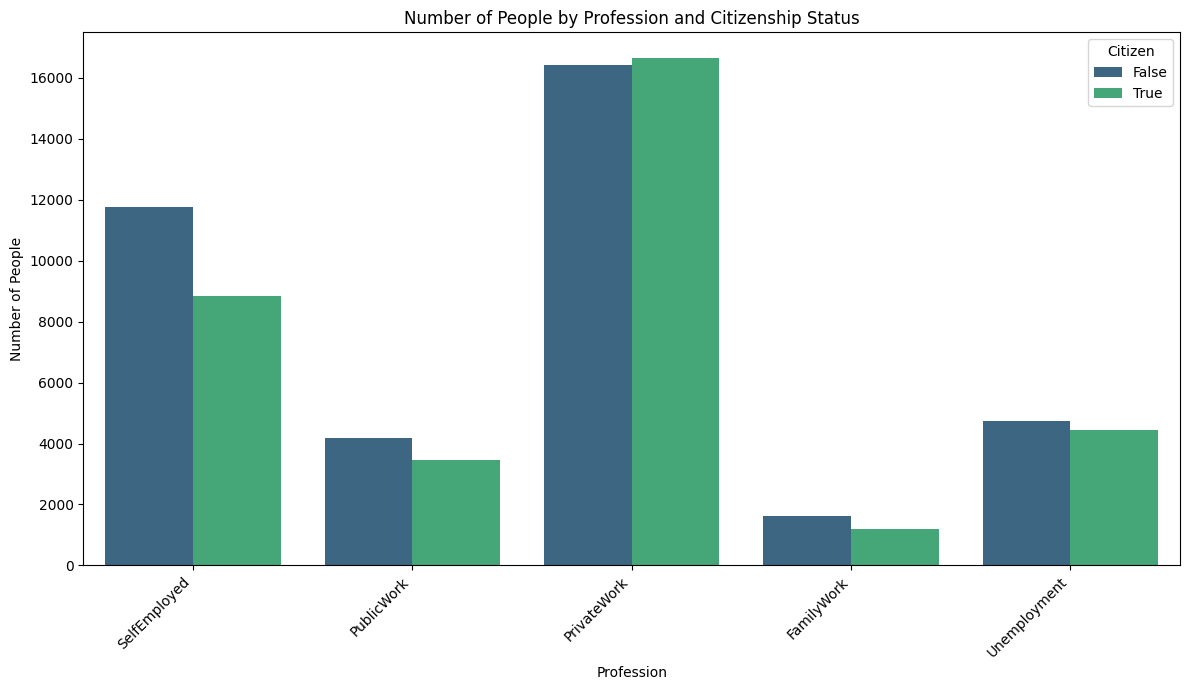

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate the data by Profession and Citizen and count
profession_citizen_counts = df.groupby(['Profession', 'Citizen']).size().unstack(fill_value=0)
print(profession_citizen_counts)

# Plot a bar chart with 'Citizen' as hue
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='Profession', hue='Citizen', palette='viridis')
plt.title('Number of People by Profession and Citizenship Status')
plt.xlabel('Profession')
plt.ylabel('Number of People')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*The raw count of unemployed individuals is roughly similar between Citizens and Non-Citizens. For non-citizens, challenging the idea that they 'usually don't work'*.

####  Even when an alien resident works, they do it for lower salaries.



> Create a boxplot of the Income broken down by Citzenship



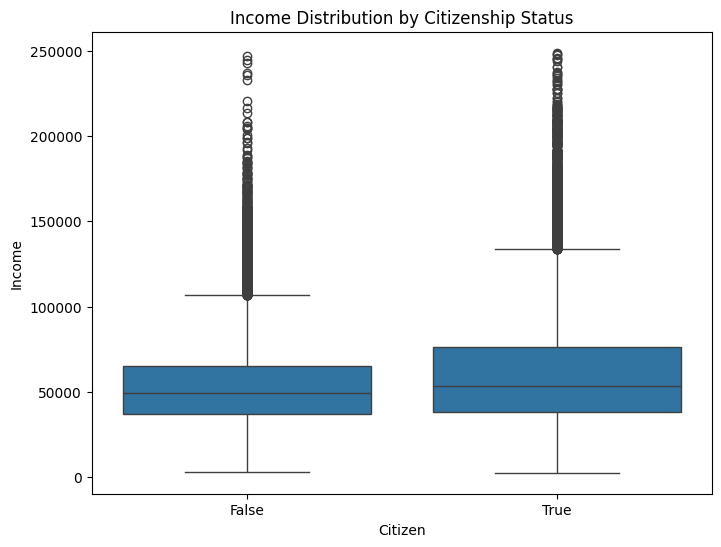

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Citizen', y='Income')
plt.title('Income Distribution by Citizenship Status')
plt.xlabel('Citizen')
plt.ylabel('Income')
plt.show()

Boxplot indicates that non-citizens generally have a lower median income compared to citizens. To verify this observation quantitatively, I will calculate and display the summary statistics for income grouped by citizenship status



> Create another boxplot of the Income broken down by Profession, and separete by color (hue) the Citzenship



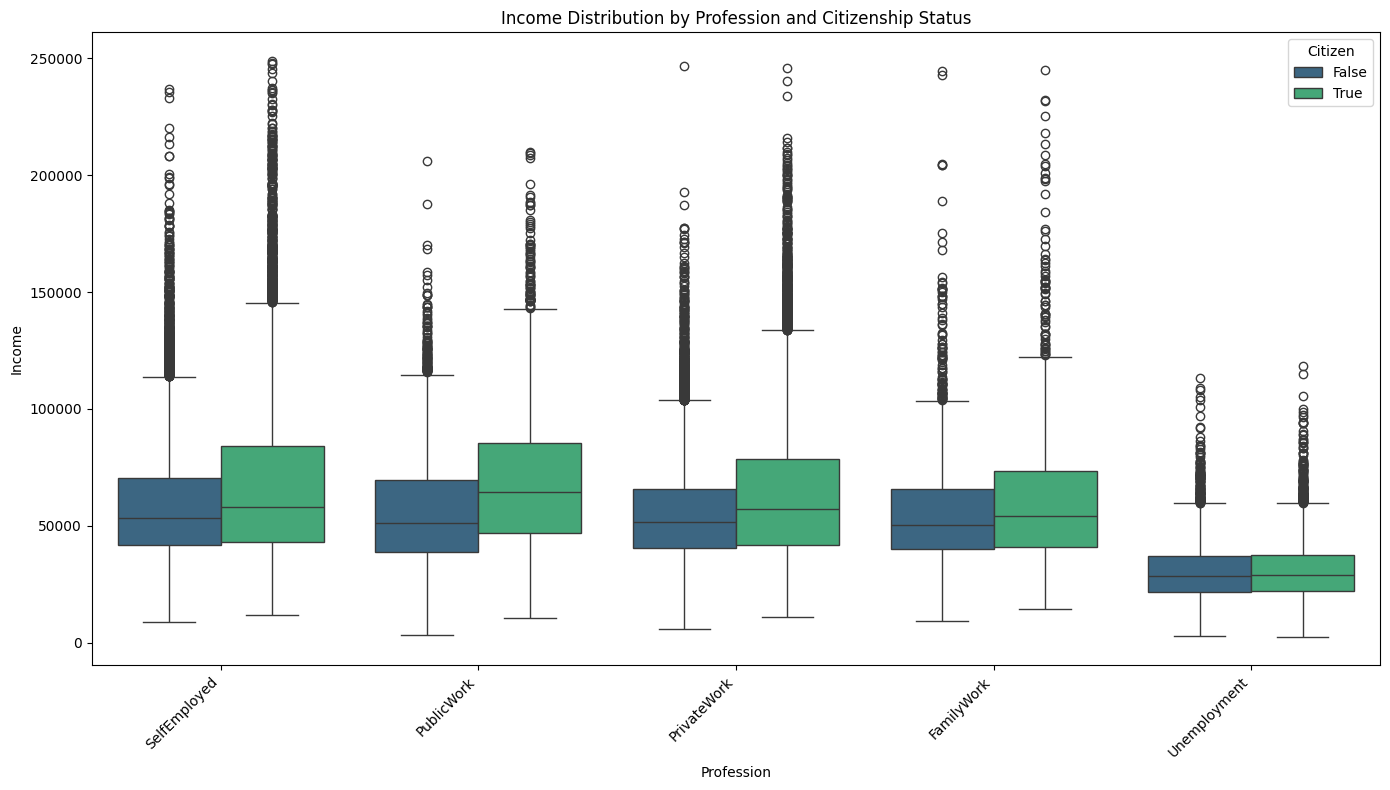

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Profession', y='Income', hue='Citizen', palette='viridis')
plt.title('Income Distribution by Profession and Citizenship Status')
plt.xlabel('Profession')
plt.ylabel('Income')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*Across most professions, you'll observe a consistent trend where the median income for citizens is notably higher than that for non-citizens. This is evident by the median line within the citizen's box being positioned above the median line for non-citizens within the same professional category*.



#### Changing subject... Government/Public works earn more than other sectors, including the Private market.



> Create a boxplot of the Income broken down by Profession



/tmp/ipython-input-36439262.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Profession', y='Income', palette='viridis')


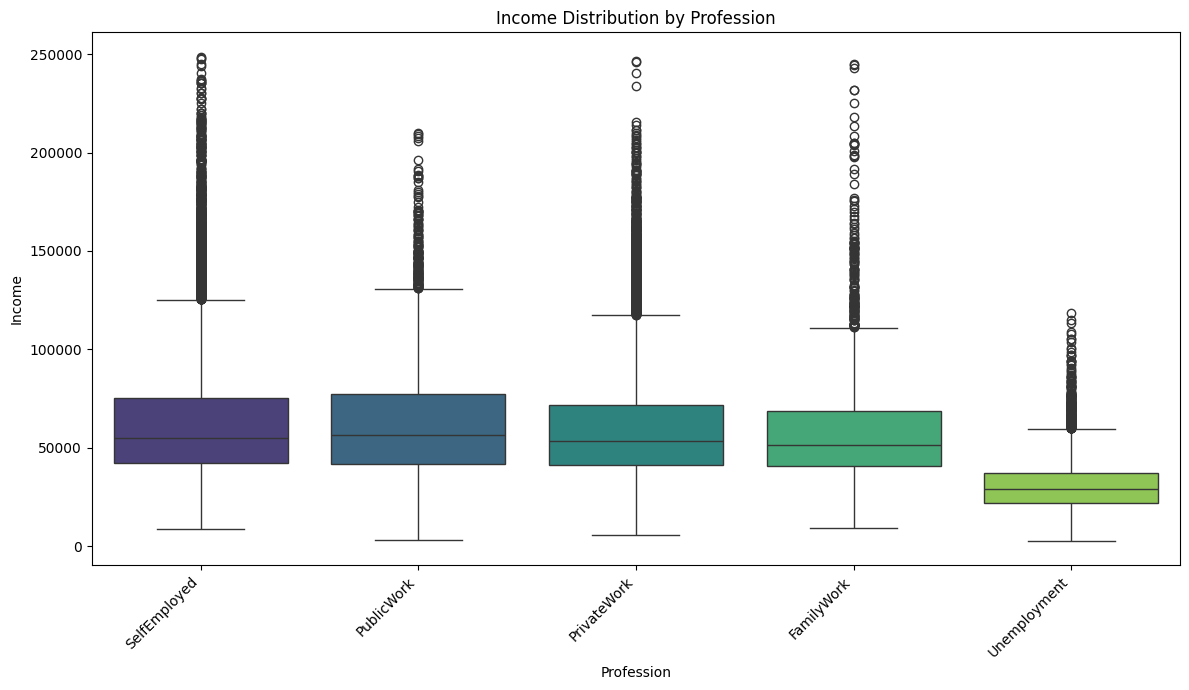

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Profession', y='Income', palette='viridis')
plt.title('Income Distribution by Profession')
plt.xlabel('Profession')
plt.ylabel('Income')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*Based on the boxplot of income distribution by profession, we can visually examine the median income for each category, from it we don't see a median higher salary for Goverment work*.

#### Maybe this is true for particular places? How about Virginia/DC ...



> Create a dataset filtered only by Virgina (DC) state.



In [12]:
virginia_df = df[df['State'] == 'Virginia']
virginia_df.head()

,State,female,Race,Citizen,Income,Profession
17647,Virginia,1,Hispanic,False,40865.0,PrivateWork
17648,Virginia,1,Hispanic,False,73462.0,SelfEmployed
17649,Virginia,1,Asian,False,73711.0,SelfEmployed
17650,Virginia,1,Asian,False,111140.0,SelfEmployed
17651,Virginia,1,Asian,False,64813.0,SelfEmployed




> Create a boxplot of the Income broken down, only for this VA dataset





/tmp/ipython-input-2423690116.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=virginia_df, x='Profession', y='Income', palette='viridis')


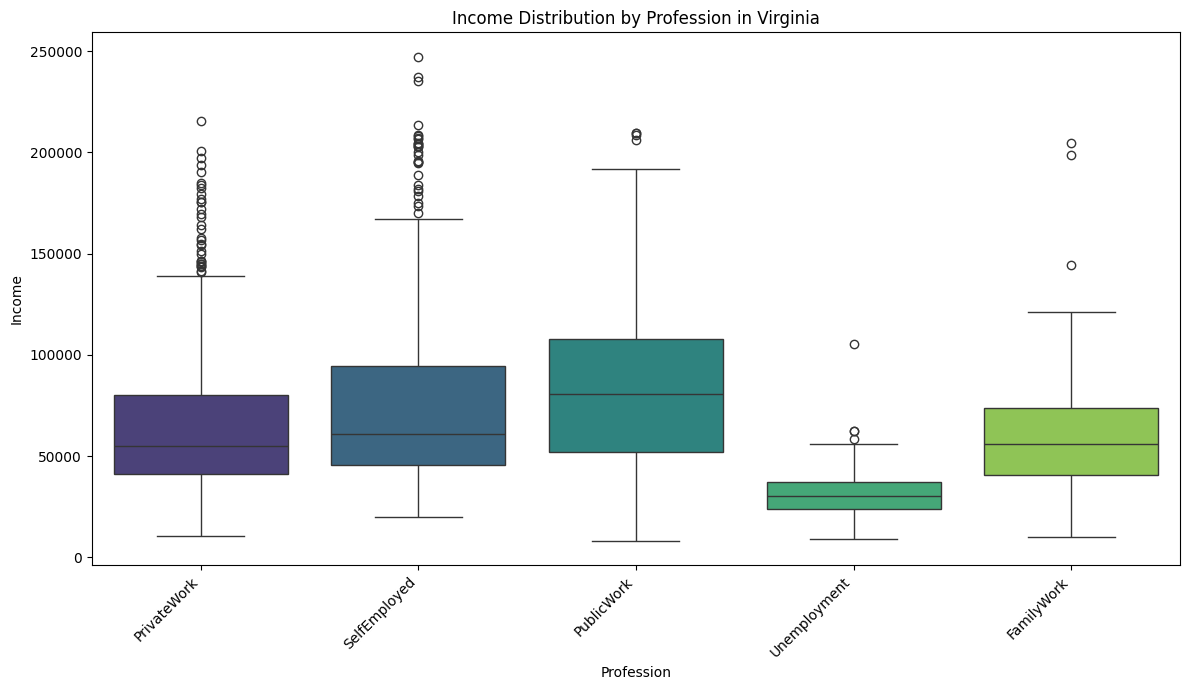

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.boxplot(data=virginia_df, x='Profession', y='Income', palette='viridis')
plt.title('Income Distribution by Profession in Virginia')
plt.xlabel('Profession')
plt.ylabel('Income')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*The central tendency of higher income for each profession within the Virginia dataset*



> From the VA dataset, filter only for the PublicWork, and calculate the quartiles, using the describe function



In [14]:
public_work_va_income = virginia_df[virginia_df['Profession'] == 'PublicWork']['Income']
public_work_va_income_stats = public_work_va_income.describe()
print(public_work_va_income_stats)

count       662.000000
mean      84249.048338
std       37659.817633
min        8043.000000
25%       52062.750000
50%       80625.000000
75%      107949.000000
max      209698.000000
Name: Income, dtype: float64


- *The graph indicates that 25% of Public Work professionals in Virginia earn below $52,062.75, 50% earn below \$52,062, 50% earn below \$80,625, and 75% earn below \$107,949*

#### One last topic, similarly to the simple bar plot comparing Profession (categorical) and Citzenship (binary). In case we had two categorical variables, how could we compare those?



> Count the percentage of people, cross referecing the Profession vs the Race, and show the bar chart comparing those



Percentage of each Race within each Profession:
Race             Asian     Black  Hispanic    Native   Pacific     White
Profession                                                              
FamilyWork    0.306878  0.049735  0.294885  0.070194  0.022928  0.255379
PrivateWork   0.246403  0.051602  0.276844  0.041354  0.030230  0.353567
PublicWork    0.172269  0.114233  0.262868  0.069196  0.044905  0.336528
SelfEmployed  0.296780  0.032004  0.276334  0.055947  0.029382  0.309553
Unemployment  0.065404  0.255414  0.428665  0.057351  0.030036  0.163130


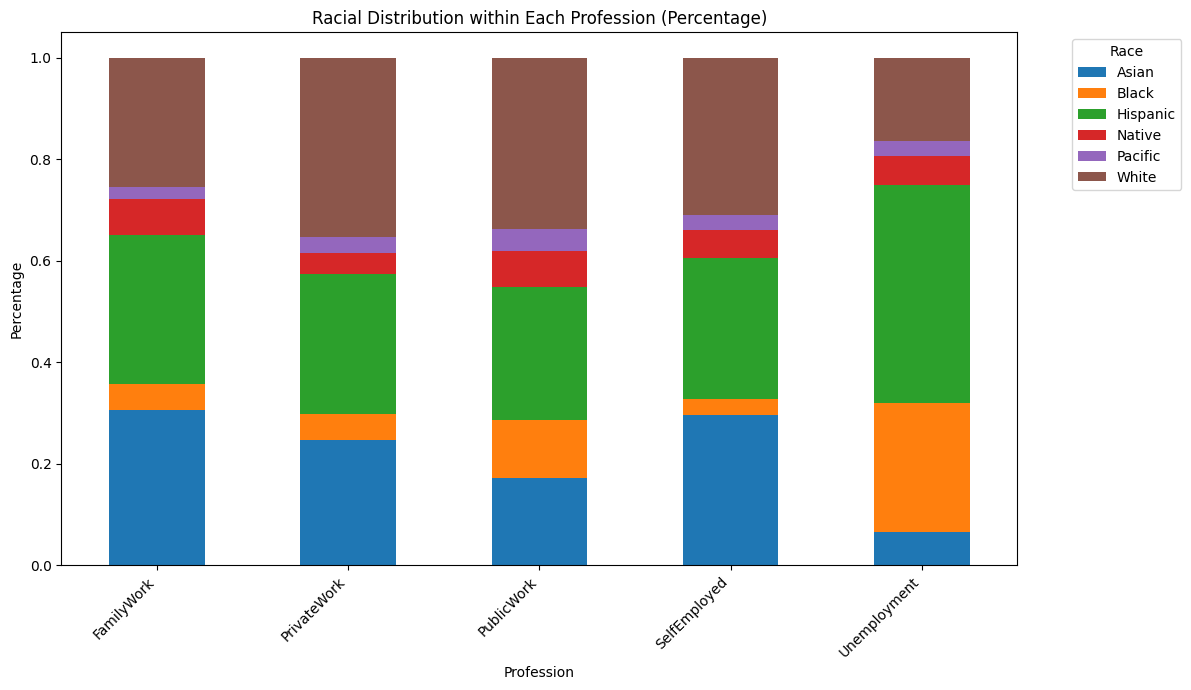

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a cross-tabulation of Profession and Race
profession_race_counts = pd.crosstab(df['Profession'], df['Race'])

# Calculate percentages per profession
profession_race_percentages = profession_race_counts.apply(lambda r: r/r.sum(), axis=1)
print('Percentage of each Race within each Profession:')
print(profession_race_percentages)

# Plotting the stacked bar chart
profession_race_percentages.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Racial Distribution within Each Profession (Percentage)')
plt.xlabel('Profession')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

*The analysis reveals that the dataset exhibits a varied racial distribution across professions. While White individuals are highly represented in 'PrivateWork' and 'PublicWork', Hispanic and Asian populations show strong representation in 'FamilyWork' and 'SelfEmployed'. Notably, the 'Unemployment' category has a significant overrepresentation of Hispanic and Black individuals, highlighting potential disparities in employment dynamics within the dataset*.

## Activity: Selection Bias

**Problem**  

Your goal is to demonstrate how analyzing a biased subset of data can lead to different, potentially misleading, insights compared to analyzing the complete, representative dataset. Go to Kaggle and select a publicly available dataset and load your chosen dataset into your analytical environment. With that, choose one or two specific aspects or relationships e that you find interesting to analyze. Then:

- Select the first 10% of the records as your "biased sample": Formulate a preliminary conclusion or hypothesis based only on this first 10% of the data.

- Comprehensive Analysis (Full Dataset): Now, perform the exact same analysis (i.e., focusing on the same aspects or relationships) using the entire dataset.

**Comparison of Conclusions**

Carefully compare the conclusions, patterns, and insights you drew from the initial 10% biased sample with those derived from the full dataset. Do your preliminary conclusions from the biased sample still hold true, or are they contradicted by the full dataset analysis? Relate your observations back to the definition of selection bias provided: "Occurs when the data sample is not representative of the target population. This can happen due to non-random sampling, over- or under-representation of certain groups, or self-selection bias."
